In [2]:
import pandas as pd


In [3]:
df=pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df["User_ID"].nunique()

5891

In [8]:
df["Product_ID"].nunique()

3623

In [9]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [10]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df["Purchase"].sum()/len(df["Purchase"])

9333.859852635065

<Axes: ylabel='ratio'>

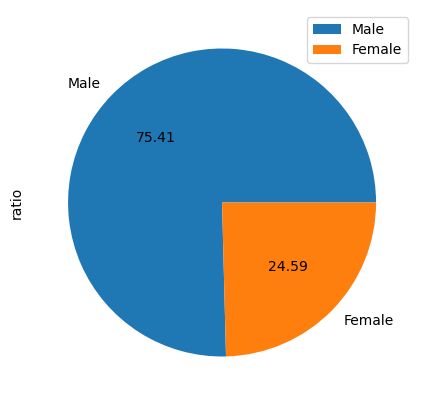

In [12]:
data=pd.DataFrame({"ratio":[len(df[df["Gender"]=="M"]), len(df[df["Gender"]=="F"])] }, index=["Male","Female"])
data.plot.pie(y="ratio", figsize=(5,5), autopct='%.2f')

<Axes: title={'center': 'Gender ratio'}>

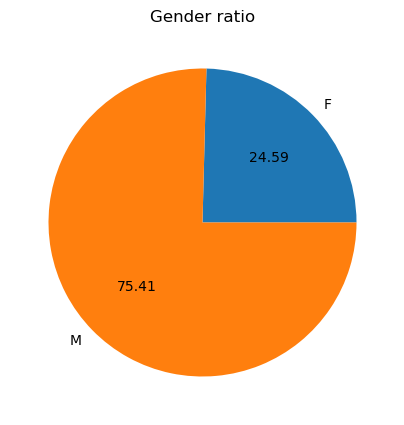

In [13]:
df.groupby("Gender").size().plot(kind="pie", autopct='%.2f', title="Gender ratio", figsize=(5,5))

<Axes: title={'center': 'Purchase distribution by Age'}, xlabel='Age'>

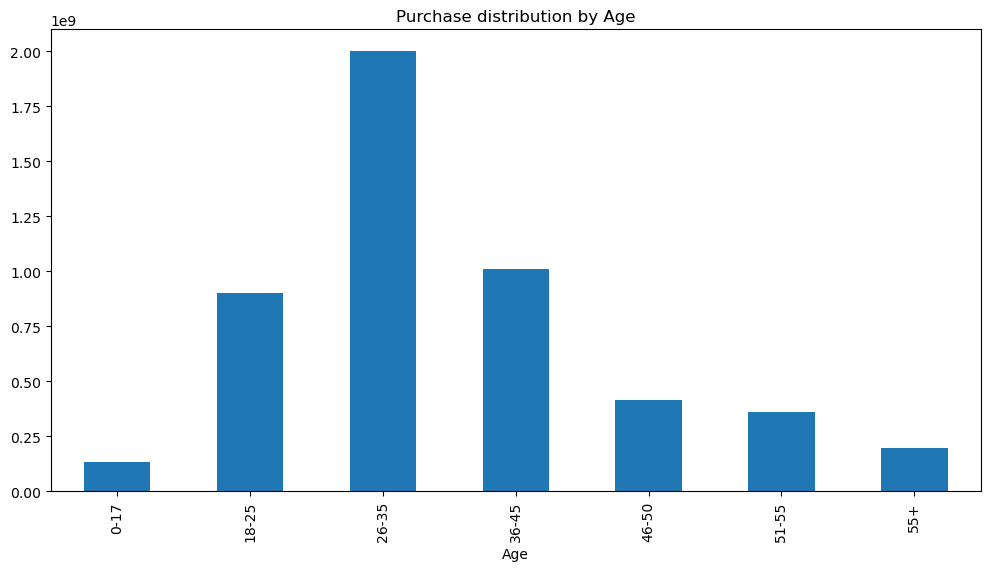

In [19]:
df.groupby("Age").sum()["Purchase"].plot(kind="bar", figsize=(12,6), title="Purchase distribution by Age")

<Axes: ylabel='Purchase'>

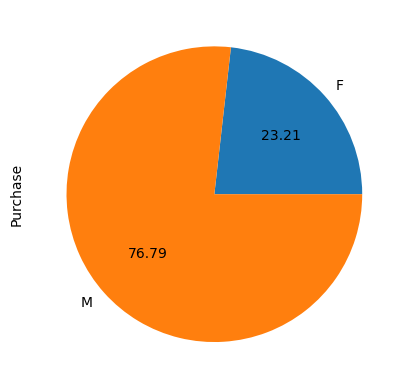

In [15]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie", autopct='%.2f')

In [21]:
list=[]
for i in df["Age"].unique():
    list.append([i,df[df["Age"]==i]["Product_ID"].nunique()])

data=pd.DataFrame(list, columns=["Age","Products"])

In [22]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

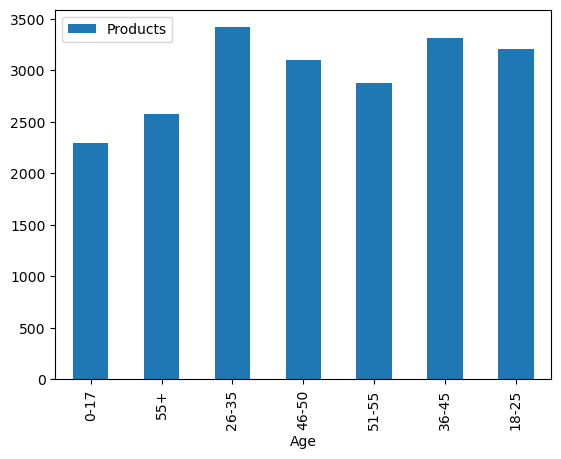

In [23]:
data.plot.bar(x="Age", y="Products")

<Axes: title={'center': 'Purchase amount distribution by Age'}, xlabel='Age'>

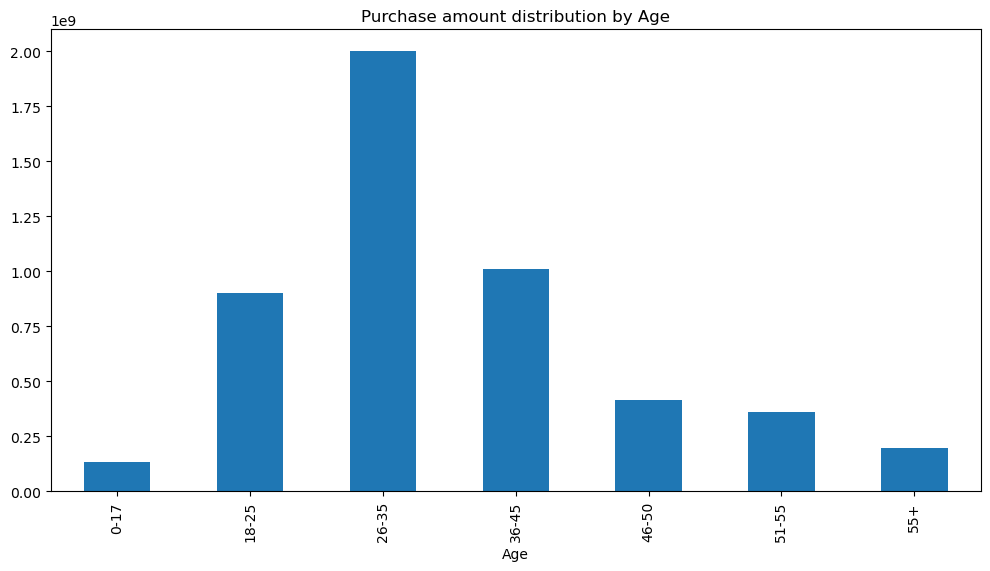

In [24]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(12,6), title="Purchase amount distribution by Age")

<Axes: ylabel='Purchase'>

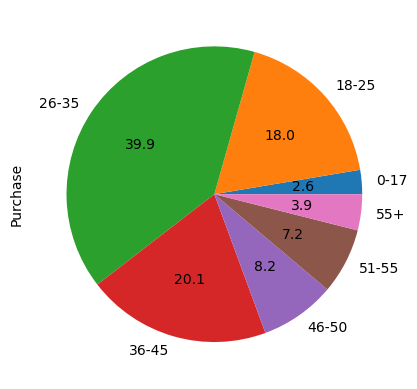

In [27]:
df.groupby('Age').sum()['Purchase'].plot(kind='pie', autopct='%.1f')

<Axes: >

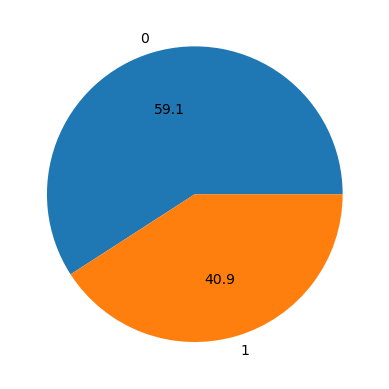

In [30]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.1f')

In [ ]:
import seaborn as sns


In [37]:
sns.set(rc={"figure.figsize":(8,6)})

<Axes: xlabel='Age', ylabel='count'>

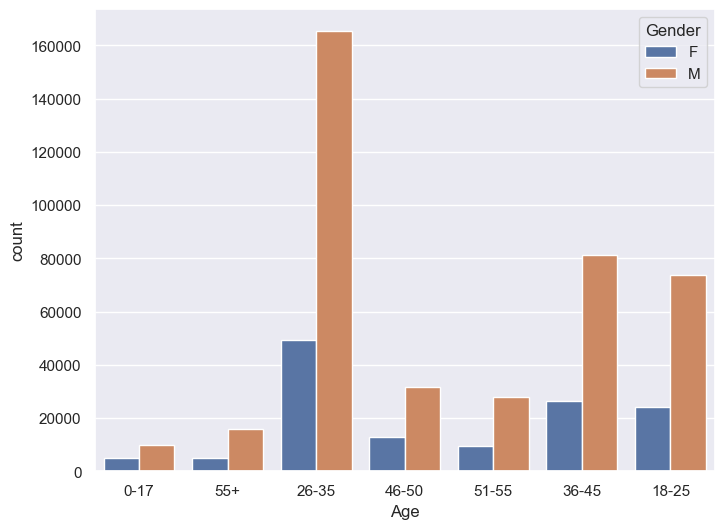

In [38]:
sns.countplot(x="Age", hue="Gender",data=df)

<Axes: xlabel='Gender', ylabel='count'>

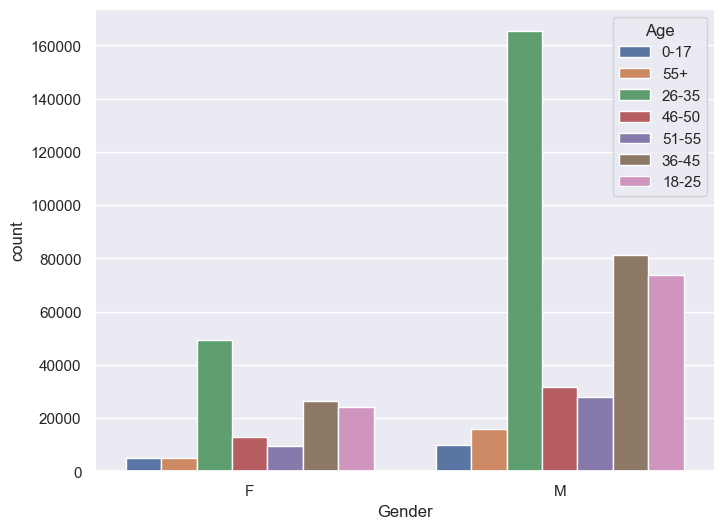

In [39]:
sns.countplot(x="Gender", hue="Age",data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

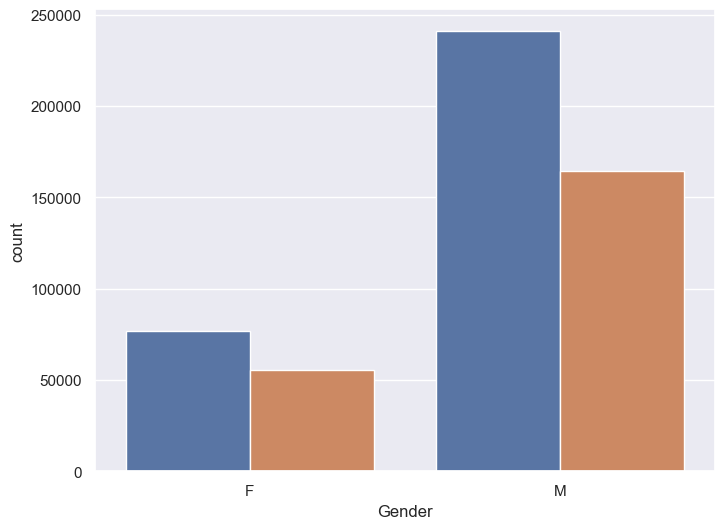

In [40]:
sns.countplot(x="Gender", hue="Marital_Status",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

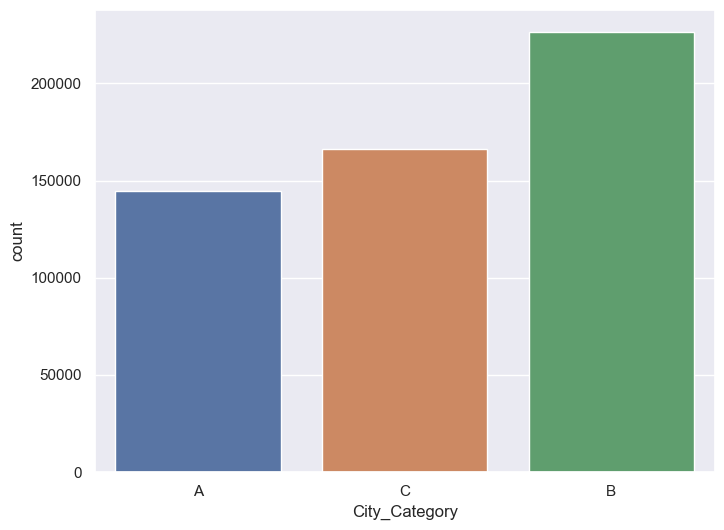

In [41]:
sns.countplot(x=df["City_Category"])

<Axes: >

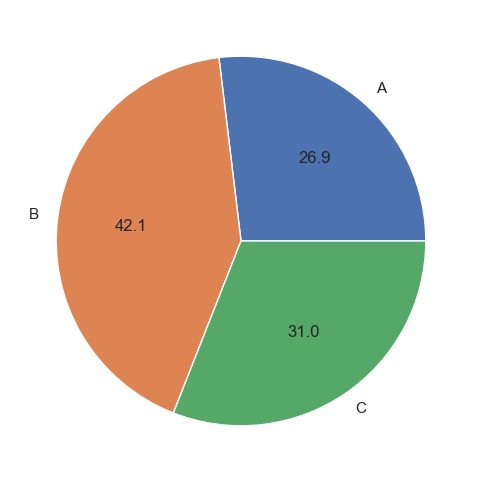

In [42]:
df.groupby('City_Category').size().plot(kind='pie', autopct="%0.1f")

<Axes: xlabel='City_Category', ylabel='count'>

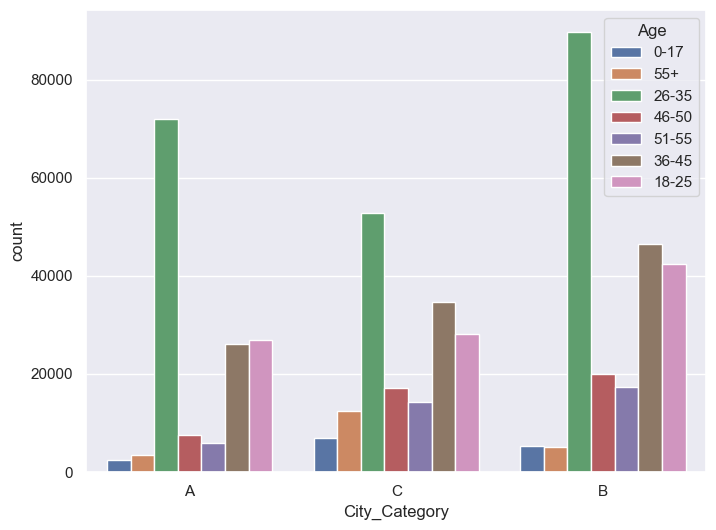

In [44]:
sns.countplot(x="City_Category", hue="Age", data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

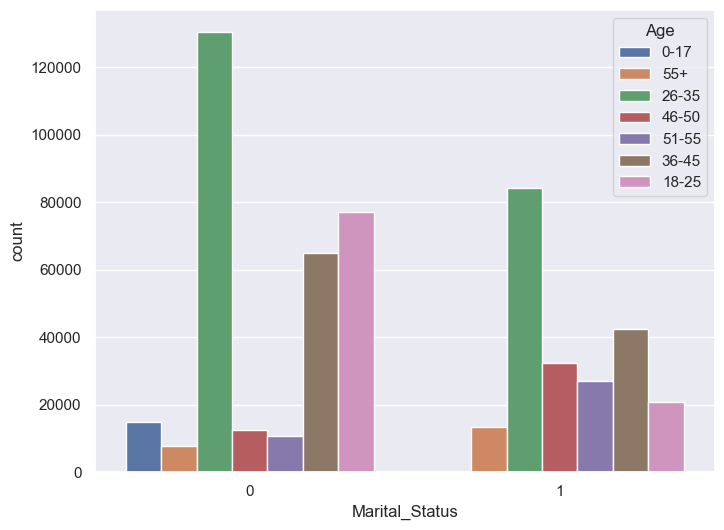

In [45]:
sns.countplot(x="Marital_Status", hue="Age", data=df)

<Axes: xlabel='City_Category', ylabel='count'>

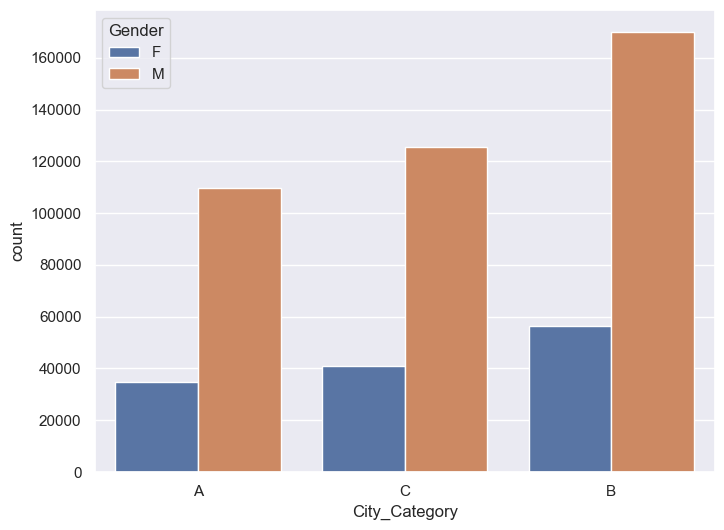

In [46]:
sns.countplot(x="City_Category", hue="Gender", data=df)

<Axes: ylabel='Purchase'>

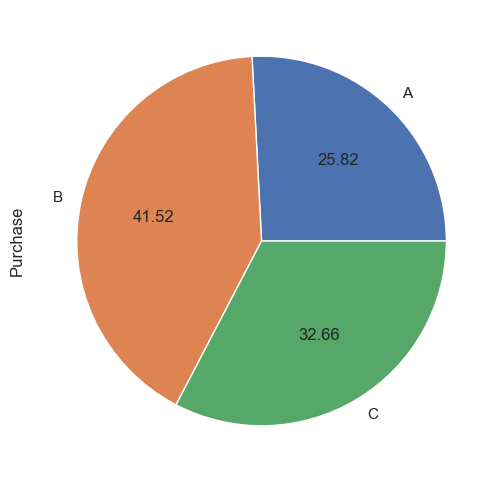

In [47]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie', autopct="%0.2f")

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

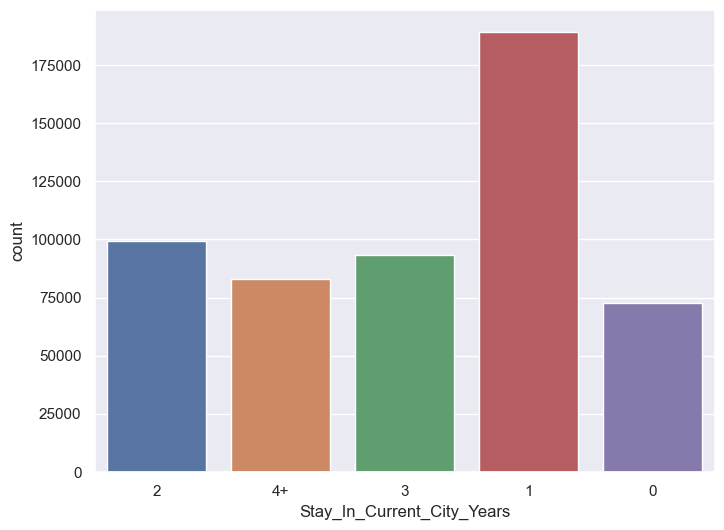

In [50]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

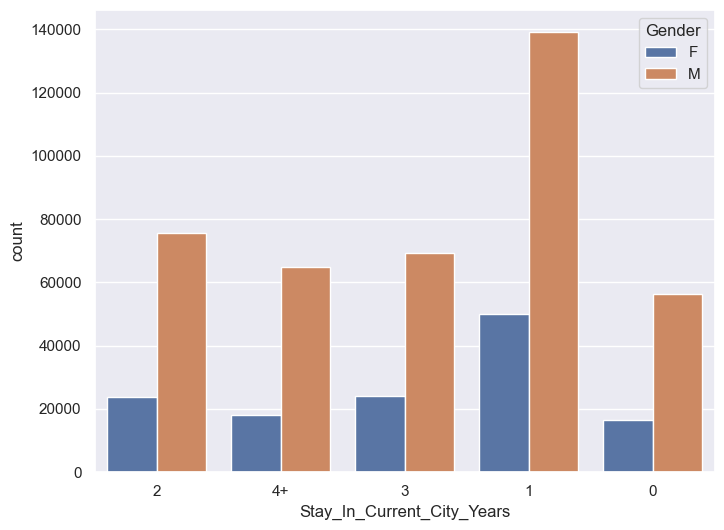

In [51]:
sns.countplot(x="Stay_In_Current_City_Years", hue="Gender", data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

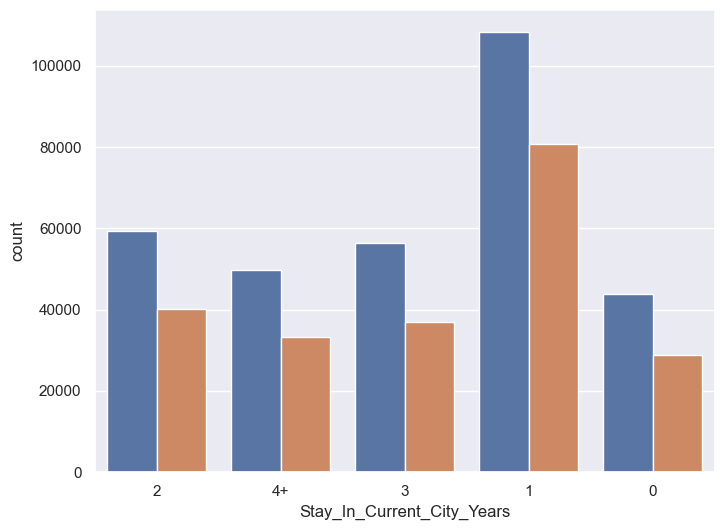

In [54]:
sns.countplot(x="Stay_In_Current_City_Years", hue="Marital_Status", data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

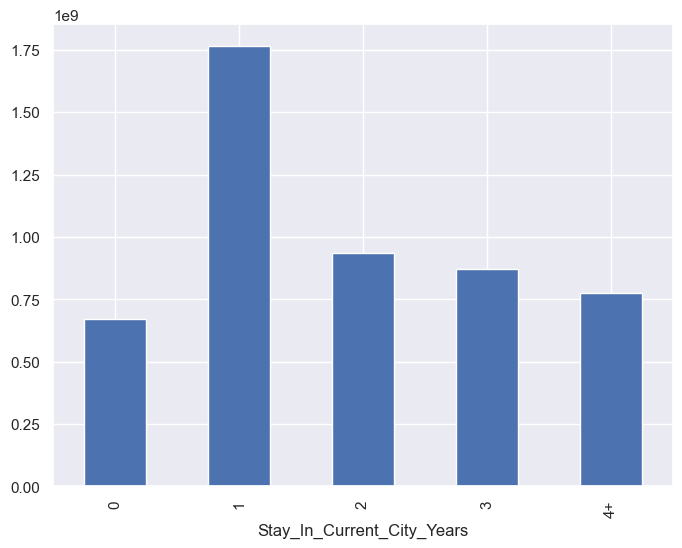

In [55]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Occupation'>

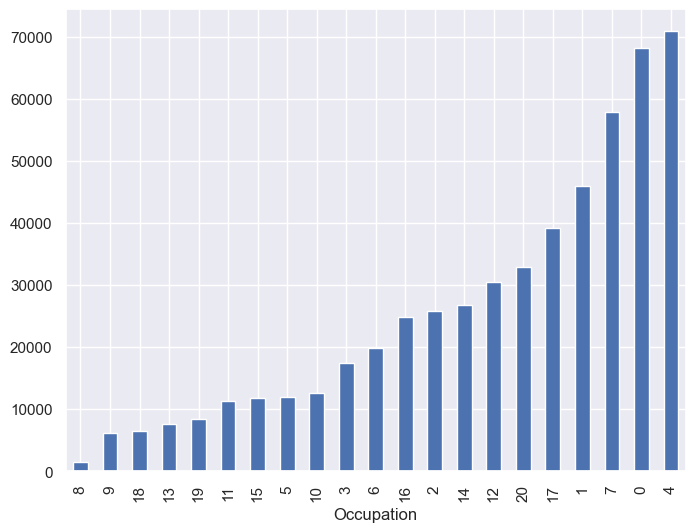

In [56]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

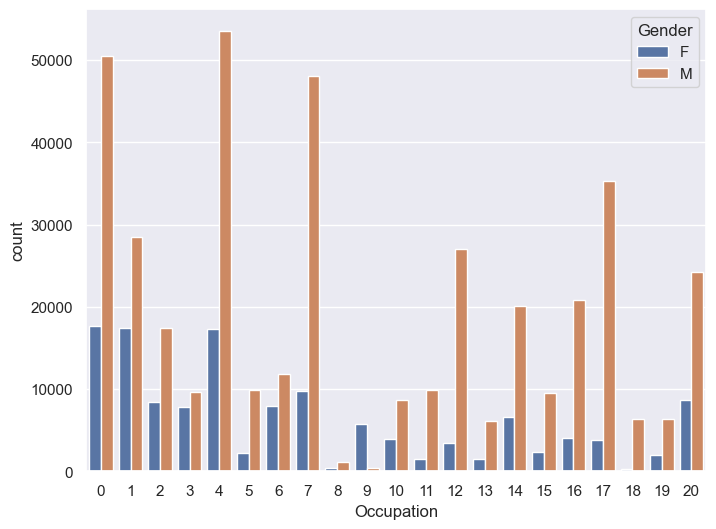

In [58]:
sns.countplot(x='Occupation', hue='Gender', data=df)

<Axes: xlabel='Occupation'>

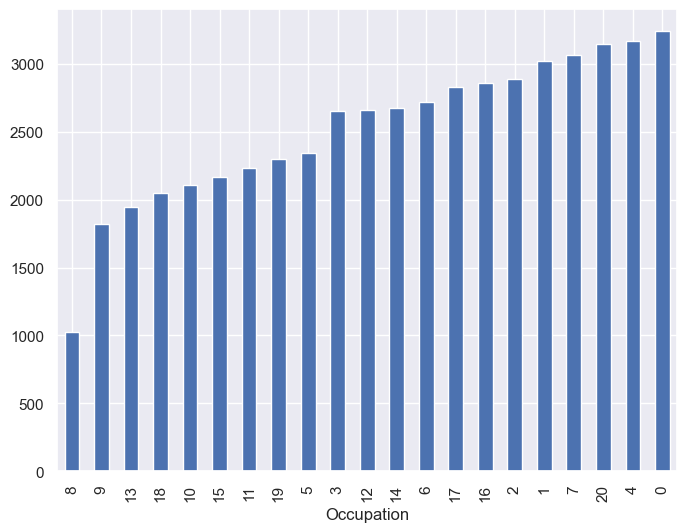

In [59]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

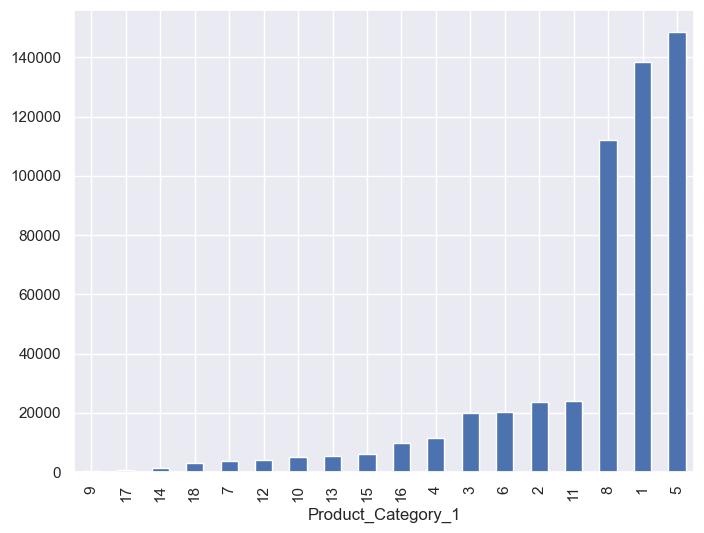

In [60]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

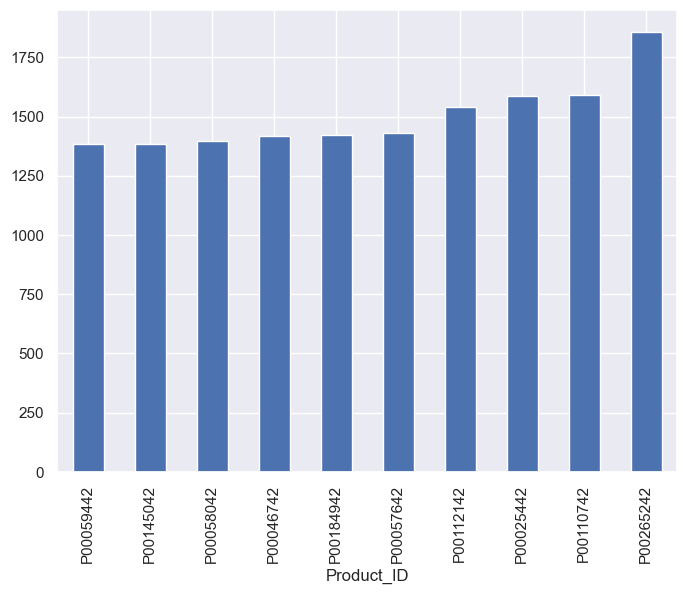

In [61]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

In [63]:
lst=[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+"-"+str(df['Marital_Status'][i]))
lst[1:4]    

['F-0', 'F-0', 'F-0']

In [64]:
df["Marital_Gender"]=lst
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F-0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F-0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F-0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F-0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M-0


<Axes: xlabel='Marital_Gender', ylabel='count'>

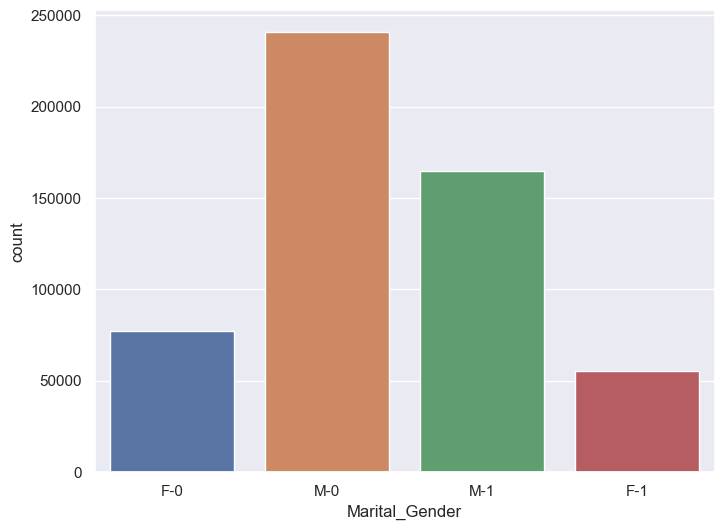

In [65]:
sns.countplot(x=df["Marital_Gender"])

<Axes: xlabel='Age', ylabel='count'>

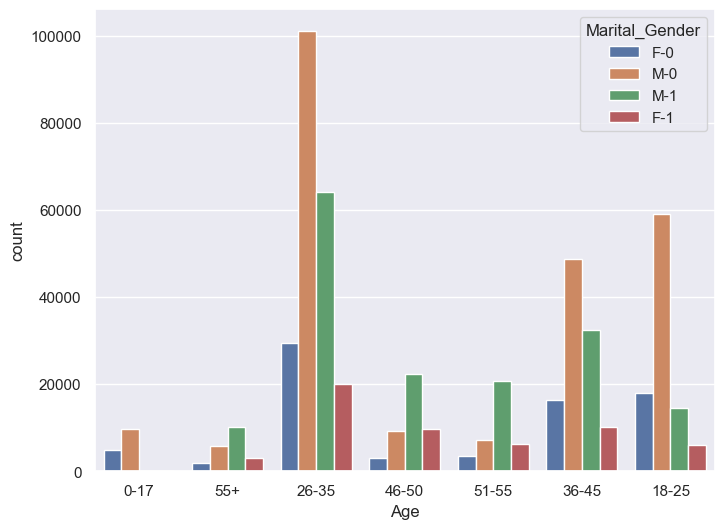

In [67]:
sns.countplot(x=df["Age"], hue=df["Marital_Gender"])